In [1]:
import warnings
warnings.simplefilter('ignore')
import statsmodels.api as sm

In [2]:
import numpy as np
x = list(range(1, 200))
y = [0]
for i in range(200):
    y.append(y[i] + np.random.normal(0, 1))

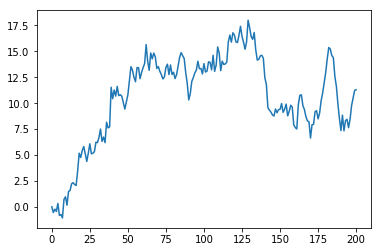

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(y)

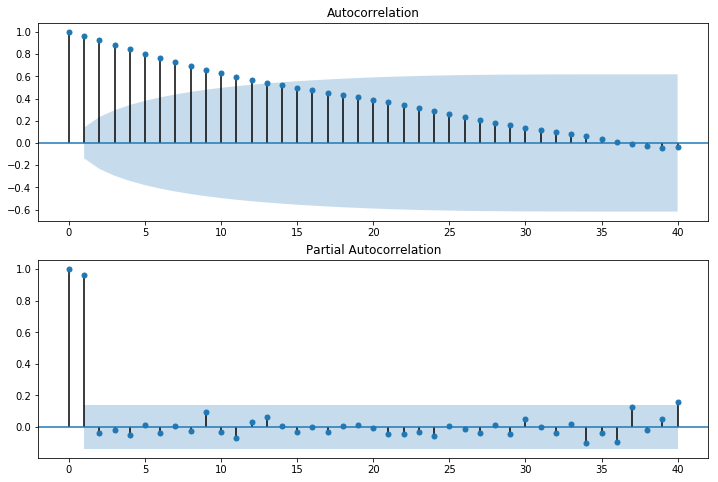

In [4]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(y, lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(y, lags=40, ax=ax2)

In [5]:
from statsmodels import tsa

In [6]:
x = list(range(len(y)))
ar_list = list(range(0, 4))
ma_list = list(range(0, 4))
for ar in ar_list:
    for ma in ma_list:
        try:
            model = tsa.arima_model.ARIMA(y, order=(ar, 0, ma))
            res = model.fit()
            print('ar=%d, ma=%d, aic=%d' % (ar, ma, res.aic))
        except:
            print('no result')

ar=0, ma=0, aic=1164
ar=0, ma=1, aic=946
no result
no result
ar=1, ma=0, aic=550
ar=1, ma=1, aic=552
ar=1, ma=2, aic=554
ar=1, ma=3, aic=555
ar=2, ma=0, aic=552
ar=2, ma=1, aic=553


/home/nryabykh/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ar=2, ma=2, aic=555
ar=2, ma=3, aic=558
ar=3, ma=0, aic=554
ar=3, ma=1, aic=554


/home/nryabykh/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ar=3, ma=2, aic=555
ar=3, ma=3, aic=557


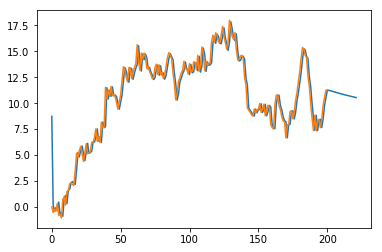

In [7]:
model = tsa.arima_model.ARIMA(y, order=(1, 0, 0))
res = model.fit()
pred = res.predict(start=0, end=len(x)+20)
plt.plot(list(range(len(pred))), pred)
plt.plot(x, y)

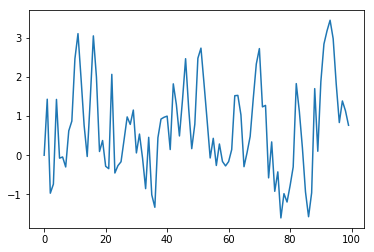

In [20]:
y = np.zeros(100)
for i in range(1, 100):
    y[i] = 0.8 * y[i-1] + np.random.normal(loc=0.0, scale=1.0)
plt.plot(y)

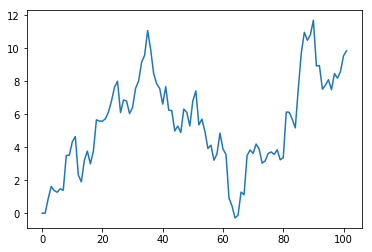

In [93]:
from collections import deque
order = 2
coefs = [1.0, 0]
y = list(np.zeros(order))
for i in range(0, 100):
    val = np.dot(y[-order:], coefs[::-1]) + np.random.normal(loc=0.0, scale=1.0)
    y.append(val)
plt.plot(y)